# PULSAR CLASSIFICATION PROJECT!
## DSCI 100 007
### Group 36
#### Ruirui Ma, Emilio Rodriguez-Sanin, William Tan, Jinay Borana


In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## Set Up

In [2]:
# RUN ME TO DOWNLOAD THE NEEDED FILE FOR ANALYSIS
download.file("https://archive.ics.uci.edu/static/public/372/htru2.zip", destfile = "./htru.zip")
unzip("./htru.zip", exdir = "data/") #unzip the zip to data folder

### Reading Data

In [3]:
pulsar_data = read_csv("data/HTRU_2.csv", col_names=c("Profile_mean", "Profile_stdev", "Profile_skewness", "Profile_kurtosis", "DM_mean", "DM_stdev", "DM_skewness", "DM_kurtosis", "class")) |>
              mutate(class = as.factor(class))
pulsar_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Profile_mean, Profile_stdev, Profile_skewness, Profile_kurtosis, DM...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean   
1     140.5625     55.68378      -0.2345714       -0.6996484       3.199833  
2     102.5078     58.88243       0.4653182       -0.5150879       1.677258  
3     103.0156     39.34165       0.3233284        1.0511644       3.121237  
⋮     ⋮            ⋮             ⋮                ⋮                ⋮         
17896 119.3359     59.93594      0.1593631        -0.74302540       21.430602
17897 114.5078     53.90240      0.2011614        -0.02478884        1.946488
17898  57.0625     85.79734      1.4063910         0.08951971      188.306020
      DM_stdev DM_skewness DM_kurtosis class
1     19.11043  7.975532    74.24222   0    
2     14.86015 10.576487   127.39358   0    
3     21.74467  7.735822    63.17191   0    
⋮     ⋮        ⋮           ⋮           ⋮    
17896 58.87200  2.499517     4.595173  0    
17897 13.38173 10.007967   134.238910  0    
17898 64.71256 -1.597527     1.429475  0

In [4]:
#initial_split of data
pulsar_split = initial_split(pulsar_data, prop = .75, strata = class)
pulsar_training = training(pulsar_split)
pulsar_testing = testing(pulsar_split)

pulsar_training
pulsar_testing

Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean   
1     140.56250    55.68378      -0.2345714       -0.6996484       3.199833  
2     103.01562    39.34165       0.3233284        1.0511644       3.121237  
3      93.57031    46.69811       0.5319048        0.4167211       1.636288  
⋮     ⋮            ⋮             ⋮                ⋮                ⋮         
13421 119.3359     59.93594      0.1593631        -0.74302540       21.430602
13422 114.5078     53.90240      0.2011614        -0.02478884        1.946488
13423  57.0625     85.79734      1.4063910         0.08951971      188.306020
      DM_stdev DM_skewness DM_kurtosis class
1     19.11043  7.975532    74.24222   0    
2     21.74467  7.735822    63.17191   0    
3     14.54507 10.621748   131.39400   0    
⋮     ⋮        ⋮           ⋮           ⋮    
13421 58.87200  2.499517     4.595173  0    
13422 13.38173 10.007967   134.238910  0    
13423 64.71256 -1.597527     1.429475  0

Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean  
1    102.50781    58.88243       0.46531815      -0.5150879       1.677258 
2    136.75000    57.17845      -0.06841464      -0.6362384       3.642977 
3     88.72656    40.67223       0.60086608       1.1234917       1.178930 
⋮    ⋮            ⋮             ⋮                ⋮                ⋮        
4473 106.8750     47.57133      0.1994400         0.2849642       3.0794314
4474 133.8203     43.47816      0.1366911         0.3531212       0.9824415
4475 121.3750     53.24516      0.1037722        -0.3651187       1.0953177
     DM_stdev  DM_skewness DM_kurtosis class
1    14.86015  10.576487   127.39358   0    
2    20.95928   6.896499    53.59366   0    
3    11.46872  14.269573   252.56731   0    
⋮    ⋮         ⋮           ⋮           ⋮    
4473 20.984455  8.427475    78.25937   0    
4474  9.486068 18.528395   444.41175   0    
4475 12.239976 16.258042   303.88002   0

## Preliminary Exploratory Data

In [5]:
pulsar_summary  = pulsar_training |>
                  group_by(class) |>
                  summarize(count = n())
pulsar_summary

class count
1 0     12223
2 1      1200

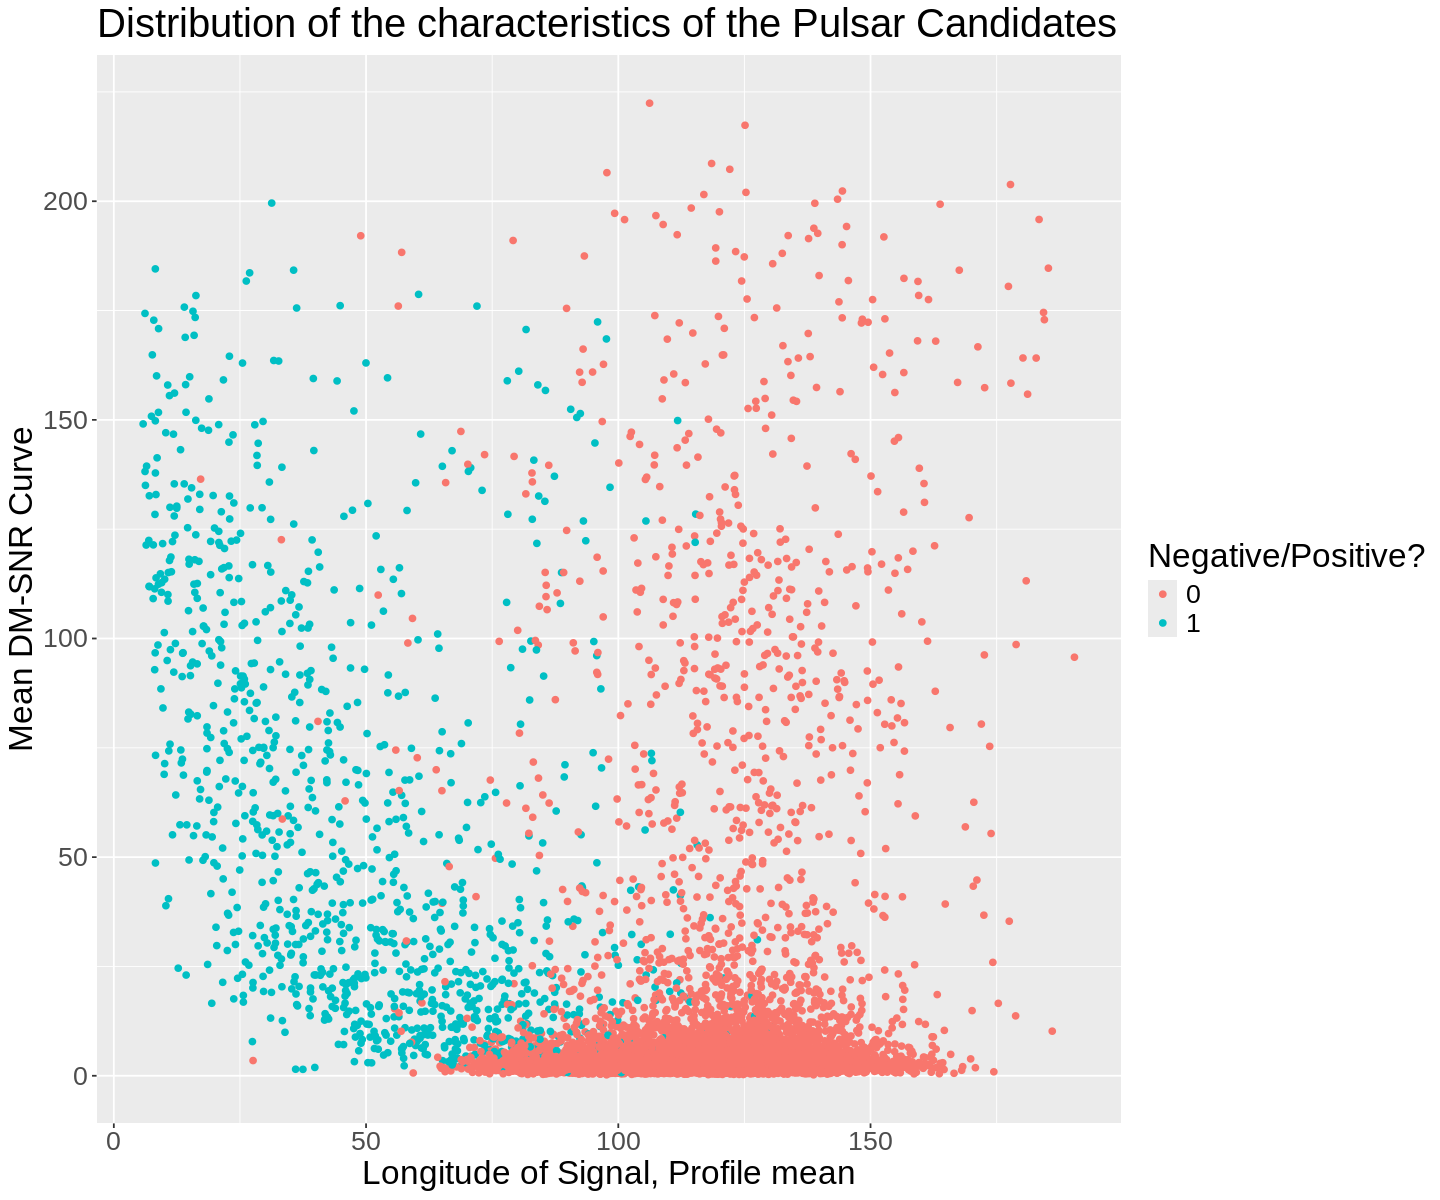

In [6]:
options(repr.plot.width = 12, repr.plot.height = 10)

pulsar_prelim_graph = pulsar_training |>
                      ggplot(aes(x=Profile_mean, y=DM_mean, color = class))+
                      geom_point()  +
                      labs(x= "Longitude of Signal, Profile mean", y = "Mean DM-SNR Curve", color = "Negative/Positive?")+
                      ggtitle("Distribution of the characteristics of the Pulsar Candidates") +
                      theme(text = element_text(size = 20))
pulsar_prelim_graph

In [7]:
#Save Image to a JPG file
ggsave("prelim_graph.jpg",pulsar_prelim_graph, width = 12, height =10)

## Modelling data

- We will first tune for k for knn classification (using 5 cross validation folds), we will be trying for k = 2:10
  - we will tuning for accuracy as tuning for either recall or precision means little
- Then we will used the tune k to create our final model
- Finally, we will collect the metrics of our model

### Training tuning model

In [ ]:
k_candidates = 2:15 

pulsar_spec_tune = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                   set_engine("kknn") |>
                   set_mode("classification")

pulsar_recipe = recipe(class ~ . , data = pulsar_training)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

train_vfold = pulsar_training |> 
              vfold_cv(v= 5, strata = class)

pulsar_workflow = workflow() |>
                  add_model(pulsar_spec_tune) |>
                  add_recipe(pulsar_recipe)

pulsar_tune_fit = pulsar_workflow |>
                  tune_grid(resamples = train_vfold, grid = tibble(neighbors = 2:10))

### collecting metrics for best neighbors

In [ ]:
metrics = pulsar_tune_fit |>
          collect_metrics() |>
          filter(.metric == "accuracy")  
metrics
cross_val_plot = ggplot(metrics, aes(x = neighbors, y = mean))+
                 geom_point() +
                 geom_line() +
                 xlab("K")+
                 ylab("accuracy") + 
                 ggtitle("K neighbors vs accuracy")
cross_val_plot

best_neighbors = metrics |>
                 slice_max(mean, n=1) |>
                 pull(neighbors)

best_neighbors

- As shown in the graph above, K value of 7 and 8 have equal mean accuracy, ~~for the sake of simplicity, we will be using K = 8 as our model~~

## Training of final classification model

#### k = 7

In [ ]:
best_k = 7

pulsar_spec = nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
              set_engine("kknn") |>
              set_mode("classification")

pulsar_recipe = recipe(class ~ . , data = pulsar_training)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

pulsar_workflow = workflow() |>
                  add_model(pulsar_spec) |>
                  add_recipe(pulsar_recipe)

pulsar_fit = pulsar_workflow |>
             fit(pulsar_training)

### collecting metrics of model when tested against testing data

In [ ]:
pulsar_pred = pulsar_fit |>
              predict(pulsar_testing)|>
              bind_cols(pulsar_testing)
pulsar_pred
metrics = pulsar_pred |>
          metrics(truth = class, estimate = .pred_class)
metrics

pulsar_conf_mat = pulsar_pred |>
                  conf_mat(truth = class, estimate = .pred_class)

pulsar_conf_mat
                

#### k = 8

In [ ]:
best_k = 8

pulsar_spec = nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
              set_engine("kknn") |>
              set_mode("classification")

pulsar_recipe = recipe(class ~ . , data = pulsar_training)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

pulsar_workflow = workflow() |>
                  add_model(pulsar_spec) |>
                  add_recipe(pulsar_recipe)

pulsar_fit = pulsar_workflow |>
             fit(pulsar_training)

### collecting metrics of model when tested against testing data

In [ ]:
pulsar_pred = pulsar_fit |>
              predict(pulsar_testing)|>
              bind_cols(pulsar_testing)
pulsar_pred
metrics = pulsar_pred |>
          metrics(truth = class, estimate = .pred_class)
metrics

pulsar_conf_mat = pulsar_pred |>
                  conf_mat(truth = class, estimate = .pred_class)

pulsar_conf_mat
                